<a href="https://colab.research.google.com/github/workingbetter/Machine_Learning/blob/main/ml04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Read the dataset
df_original = pd.read_csv("/content/drive/MyDrive/Machine learning/project/storedata.csv")

# # EDA using scatter plots
# sns.pairplot(df_original.select_dtypes(include=['int64', 'float64']))
# plt.show()

# # EDA using heatmaps
# numerical_features = df_original.select_dtypes(include=['int64', 'float64'])
# corr_matrix = numerical_features.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.show()

# Data cleaning

# Define data cleaning conditions
data_cleaning_conditions = {
    'Car park': {
        'Y': 'Yes',
        'N': 'No',
    },
    'Staff': (0, 100),
    'Location': 'Village',
}

# Function to apply data cleaning conditions
def clean_data(df, conditions):
    df = df.copy()
    for col, condition in conditions.items():
        if isinstance(condition, dict):
            df[col] = df[col].replace(condition)
        elif isinstance(condition, tuple):
            df = df[(df[col] > condition[0]) & (df[col] < condition[1])]
        elif col == 'Location':
            df = df[df[col] != condition]
    return df

df = clean_data(df_original, data_cleaning_conditions)
df.reset_index(drop=True)

# (The rest of the code remains the same as before)

# Encode target variable as 1 for 'Good' and 0 for 'Bad'
df['Performance'] = df['Performance'].map({'Good': 1, 'Bad': 0})

# Drop unwanted columns
df = df.drop(columns=['Town', 'Country', 'Store ID', 'Manager name'])

# Separate the features (X) and target (y)
X = df.drop('Performance', axis=1)
y = df['Performance']

# Encode categorical variables
le = LabelEncoder()
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# One-hot encoding of categorical features
X_encoded = pd.get_dummies(X_encoded, columns=["Car park", "Location"])



from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(random_state=3071806, max_iter=1000)
tree = DecisionTreeClassifier(random_state=3071806)
nn = MLPClassifier(max_iter=5000, random_state=3071806)
# Function to find the optimal k using cross-validation
def find_optimal_k(model, X, y):
    best_k = 0
    best_score = 0
    max_k = X.shape[1]

    for k in range(1, max_k + 1):
        selector = SelectKBest(score_func=f_classif, k=k)
        X_k_best = selector.fit_transform(X, y)
        scores = cross_val_score(model, X_k_best, y, cv=5)
        mean_score = scores.mean()

        if mean_score > best_score:
            best_score = mean_score
            best_k = k

    return best_k

# Find the optimal k for logistic regression
logreg_optimal_k = find_optimal_k(logreg, X_encoded, y)
print("Optimal k for logistic regression CV:", logreg_optimal_k)

# Find the optimal k for decision tree
tree_optimal_k = find_optimal_k(tree, X_encoded, y)
print("Optimal k for decision tree CV:", tree_optimal_k)

# Find the optimal k for neural network
nn_optimal_k = find_optimal_k(nn, X_encoded, y)
print("Optimal k for neural network CV:", nn_optimal_k)

Optimal k for logistic regression CV: 9
Optimal k for decision tree CV: 5
Optimal k for neural network CV: 4


In [ ]:
# (Previous code remains the same)

# Find the optimal k for logistic regression
logreg_optimal_k = find_optimal_k(logreg, X_encoded, y)
print("Optimal k for logistic regression CV:", logreg_optimal_k)

# Find the optimal k for decision tree
tree_optimal_k = find_optimal_k(tree, X_encoded, y)
print("Optimal k for decision tree CV:", tree_optimal_k)

# Find the optimal k for neural network
nn_optimal_k = find_optimal_k(nn, X_encoded, y)
print("Optimal k for neural network CV:", nn_optimal_k)

# Function to find the selected features for the given model and optimal k
def find_selected_features(model, X, y, optimal_k):
    selector = SelectKBest(score_func=f_classif, k=optimal_k)
    X_k_best = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    return selected_features

# Find selected features for logistic regression
selected_features_logreg = find_selected_features(logreg, X_encoded, y, logreg_optimal_k)
print("Selected features for logistic regression:\n", selected_features_logreg, len(selected_features_logreg))

# Find selected features for decision tree
selected_features_tree = find_selected_features(tree, X_encoded, y, tree_optimal_k)
print("Selected features for decision tree:\n", selected_features_tree, len(selected_features_tree))

# Combine the selected features from logistic regression and decision tree
combined_features = np.union1d(selected_features_logreg, selected_features_tree)
print("Combined features:", combined_features, len(combined_features))

# (The rest of the code remains the same as before)
selected_feature_names = combined_features

Optimal k for logistic regression CV: 9
Optimal k for decision tree CV: 5
Optimal k for neural network CV: 4
Selected features for logistic regression:
 Index(['Staff', 'Floor Space', 'Window', 'Clearance space',
       'Competition number', 'Competition score', 'Car park_0', 'Location_0',
       'Location_2'],
      dtype='object') 9
Selected features for decision tree:
 Index(['Staff', 'Window', 'Competition score', 'Location_0', 'Location_2'], dtype='object') 5
Combined features: ['Car park_0' 'Clearance space' 'Competition number' 'Competition score'
 'Floor Space' 'Location_0' 'Location_2' 'Staff' 'Window'] 9


In [ ]:

# Feature selection for logistic regression
selector_logreg = SelectKBest(score_func=f_classif, k=logreg_optimal_k)
X_selected_logreg = selector_logreg.fit_transform(X_encoded, y)

# Feature selection for decision tree
selector_tree = SelectKBest(score_func=f_classif, k=tree_optimal_k)
X_selected_tree = selector_tree.fit_transform(X_encoded, y)

# Feature selection for neural network
selector_nn = SelectKBest(score_func=f_classif, k=nn_optimal_k)
X_selected_nn = selector_nn.fit_transform(X_encoded, y)


# # Splitting the data
# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


# Add additional scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Test each scaler and choose the one that gives the best result for your data
best_scalers = {
    'logreg': (None, 0),
    'tree': (None, 0),
    'nn': (None, 0)
}

for scaler_name, scaler_instance in scalers.items():
    for model_name, model_instance in [('logreg', logreg), ('tree', tree), ('nn', nn)]:
        if model_name == 'logreg':
            X_selected = X_selected_logreg
        elif model_name == 'tree':
            X_selected = X_selected_tree
        elif model_name == 'nn':
            X_selected = X_selected_nn

        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

        X_train_scaled = scaler_instance.fit_transform(X_train)
        X_val_scaled = scaler_instance.transform(X_val)

        model_instance.fit(X_train_scaled, y_train)
        score = model_instance.score(X_val_scaled, y_val)

        if score > best_scalers[model_name][1]:
            best_scalers[model_name] = (scaler_name, score)

for model_name, (scaler_name, score) in best_scalers.items():
    print(f"Best scaler for {model_name}: {scaler_name}")



Best scaler for logreg: MinMaxScaler
Best scaler for tree: StandardScaler
Best scaler for nn: MinMaxScaler


In [ ]:
# Split the data into training, validation, and test sets
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(X_selected_logreg, y, test_size=0.2, random_state=42)
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_selected_tree, y, test_size=0.2, random_state=42)
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_selected_nn, y, test_size=0.2, random_state=42)

X_train_logreg, X_val_logreg, y_train_logreg, y_val_logreg = train_test_split(X_train_logreg, y_train_logreg, test_size=0.25, random_state=42)
X_train_tree, X_val_tree, y_train_tree, y_val_tree = train_test_split(X_train_tree, y_train_tree, test_size=0.25, random_state=42)
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train_nn, y_train_nn, test_size=0.25, random_state=42)

# Scale the data using the best scalers for each model
scaler_logreg = MinMaxScaler()
X_train_logreg_scaled = scaler_logreg.fit_transform(X_train_logreg)
X_val_logreg_scaled = scaler_logreg.transform(X_val_logreg)
X_test_logreg_scaled = scaler_logreg.transform(X_test_logreg)

scaler_tree = StandardScaler()
X_train_tree_scaled = scaler_tree.fit_transform(X_train_tree)
X_val_tree_scaled = scaler_tree.transform(X_val_tree)
X_test_tree_scaled = scaler_tree.transform(X_test_tree)

scaler_nn = MinMaxScaler()
X_train_nn_scaled = scaler_nn.fit_transform(X_train_nn)
X_val_nn_scaled = scaler_nn.transform(X_val_nn)
X_test_nn_scaled = scaler_nn.transform(X_test_nn)

# Train models using scaled data
logreg.fit(X_train_logreg_scaled, y_train_logreg)
tree.fit(X_train_tree_scaled, y_train_tree)
nn.fit(X_train_nn_scaled, y_train_nn)


MLPClassifier(max_iter=5000, random_state=3071806)

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix

# Hyperparameter tuning for Logistic Regression
param_grid_logreg = {"C": [0.001, 0.01, 0.1, 1, 10, 100], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}
scorer = make_scorer(f1_score)

# Grid search for Logistic Regression
grid_logreg = GridSearchCV(logreg, param_grid_logreg, scoring=scorer, cv=5, n_jobs=-1)
grid_logreg.fit(X_val_logreg_scaled, y_val_logreg)

# Get best parameters and score for Logistic Regression
best_params_logreg = grid_logreg.best_params_
best_score_logreg = grid_logreg.best_score_

# Print best parameters and score for Logistic Regression
print("\nBest parameters for Logistic Regression: ", best_params_logreg)
print("Best score for Logistic Regression: ", best_score_logreg)

# Hyperparameter tuning for Decision Tree
param_grid_tree = {"max_depth": list(range(1, 21)), "criterion": ["gini", "entropy"], "min_samples_split": [2, 5, 10, 20], "min_samples_leaf": [1, 5, 10]}

# Grid search for Decision Tree
grid_tree = GridSearchCV(tree, param_grid_tree, scoring=scorer, cv=5, n_jobs=-1)
grid_tree.fit(X_val_tree_scaled, y_val_tree)

# Get best parameters and score for Decision Tree
best_params_tree = grid_tree.best_params_
best_score_tree = grid_tree.best_score_

# Print best parameters and score for Decision Tree
print("\nBest parameters for Decision Tree: ", best_params_tree)
print("Best score for Decision Tree: ", best_score_tree)

# Hyperparameter tuning for Neural Network
param_grid_nn = {"hidden_layer_sizes": [(50, 50), (100, 50), (100, 100)], "alpha": [0.0001, 0.001, 0.01, 0.1], "activation": ["relu", "tanh"]}


# Grid search for Neural Network
grid_nn = GridSearchCV(nn, param_grid_nn, scoring=make_scorer(f1_score), cv=5, n_jobs=-1)
grid_nn.fit(X_val_nn_scaled, y_val_nn)

# Get best parameters and score for Neural Network
best_params_nn = grid_nn.best_params_
best_score_nn = grid_nn.best_score_

# Print best parameters and score for Neural Network
print("\nBest parameters for Neural Network: ", best_params_nn)
print("Best score for Neural Network: ", best_score_nn)

# Fit models with tuned hyperparameters
logreg_tuned = LogisticRegression(**best_params_logreg, random_state=3071806, max_iter=1000)
tree_tuned = DecisionTreeClassifier(**best_params_tree, random_state=3071806)
nn_tuned = MLPClassifier(**best_params_nn, max_iter=5000, random_state=3071806)

# Train the models using the tuned hyperparameters and the entire training set
logreg_tuned.fit(X_train_logreg_scaled, y_train_logreg)
tree_tuned.fit(X_train_tree_scaled, y_train_tree)
nn_tuned.fit(X_train_nn_scaled, y_train_nn)





Best parameters for Logistic Regression:  {'C': 10, 'solver': 'liblinear'}
Best score for Logistic Regression:  0.8761904761904763

Best parameters for Decision Tree:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score for Decision Tree:  0.8158730158730159

Best parameters for Neural Network:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant'}
Best score for Neural Network:  0.76


MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=5000, random_state=3071806)

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix

# Evaluate models on test set
y_pred_logreg = logreg_tuned.predict(X_test_logreg_scaled)
y_pred_tree = tree_tuned.predict(X_test_tree_scaled)
y_pred_nn = nn_tuned.predict(X_test_nn_scaled)

# Calculate evaluation metrics for each model
acc_logreg = accuracy_score(y_test_logreg, y_pred_logreg)
acc_tree = accuracy_score(y_test_tree, y_pred_tree)
acc_nn = accuracy_score(y_test_nn, y_pred_nn)

prec_logreg = precision_score(y_test_logreg, y_pred_logreg)
prec_tree = precision_score(y_test_tree, y_pred_tree)
prec_nn = precision_score(y_test_nn, y_pred_nn)

recall_logreg = recall_score(y_test_logreg, y_pred_logreg)
recall_tree = recall_score(y_test_tree, y_pred_tree)
recall_nn = recall_score(y_test_nn, y_pred_nn)

f1_logreg = f1_score(y_test_logreg, y_pred_logreg)
f1_tree = f1_score(y_test_tree, y_pred_tree)
f1_nn = f1_score(y_test_nn, y_pred_nn)

roc_auc_logreg = roc_auc_score(y_test_logreg, y_pred_logreg)
roc_auc_tree = roc_auc_score(y_test_tree, y_pred_tree)
roc_auc_nn = roc_auc_score(y_test_nn, y_pred_nn)

pr_logreg = average_precision_score(y_test_logreg, y_pred_logreg)
pr_tree = average_precision_score(y_test_tree, y_pred_tree)
pr_nn = average_precision_score(y_test_nn, y_pred_nn)

conf_matrix_logreg = confusion_matrix(y_test_logreg, y_pred_logreg)
conf_matrix_tree = confusion_matrix(y_test_tree, y_pred_tree)
conf_matrix_nn = confusion_matrix(y_test_nn, y_pred_nn)

# Print evaluation metrics for each model
print("\nTest accuracy for Logistic Regression: ", acc_logreg)
print("Test accuracy for Decision Tree: ", acc_tree)
print("Test accuracy for Neural Network: ", acc_nn)

print("\nTest precision for Logistic Regression: ", prec_logreg)
print("Test precision for Decision Tree: ", prec_tree)
print("Test precision for Neural Network: ", prec_nn)

print("\nTest recall for Logistic Regression: ", recall_logreg)
print("Test recall for Decision Tree: ", recall_tree)
print("Test recall for Neural Network: ", recall_nn)

print("\nTest F1 score for Logistic Regression: ", f1_logreg)
print("Test F1 score for Decision Tree: ", f1_tree)
print("Test F1 score for Neural Network: ", f1_nn)

print("\nTest AUC-ROC for Logistic Regression: ", roc_auc_logreg)
print("Test AUC-ROC for Decision Tree: ", roc_auc_tree)
print("Test AUC-ROC for Neural Network: ", roc_auc_nn)

print("\nTest PR-curve for Logistic Regression: ", pr_logreg)
print("Test PR-curve for Decision Tree: ", pr_tree)
print("Test PR-curve for Neural Network: ", pr_nn)

print("\nConfusion matrix for Logistic Regression: \n", conf_matrix_logreg)
print("\nConfusion matrix for Decision Tree: \n", conf_matrix_tree)
print("\nConfusion matrix for Neural Network: \n", conf_matrix_nn)



Test accuracy for Logistic Regression:  0.8148148148148148
Test accuracy for Decision Tree:  0.7037037037037037
Test accuracy for Neural Network:  0.7037037037037037

Test precision for Logistic Regression:  0.8
Test precision for Decision Tree:  0.6666666666666666
Test precision for Neural Network:  0.6153846153846154

Test recall for Logistic Regression:  0.7272727272727273
Test recall for Decision Tree:  0.5454545454545454
Test recall for Neural Network:  0.7272727272727273

Test F1 score for Logistic Regression:  0.761904761904762
Test F1 score for Decision Tree:  0.6
Test F1 score for Neural Network:  0.6666666666666667

Test AUC-ROC for Logistic Regression:  0.8011363636363636
Test AUC-ROC for Decision Tree:  0.6789772727272727
Test AUC-ROC for Neural Network:  0.7073863636363636

Test PR-curve for Logistic Regression:  0.692929292929293
Test PR-curve for Decision Tree:  0.5488215488215488
Test PR-curve for Neural Network:  0.5586635586635587

Confusion matrix for Logistic Regre

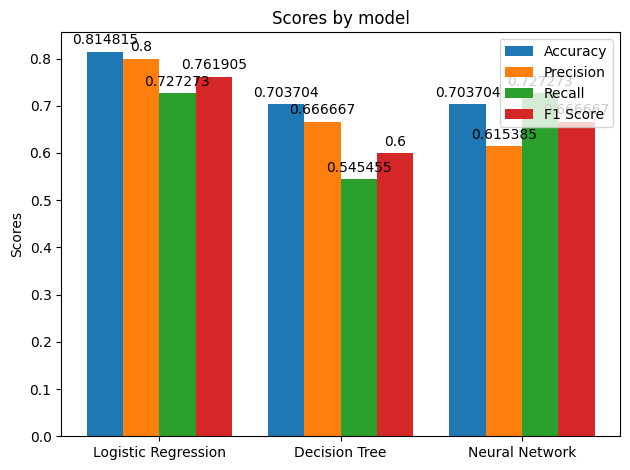

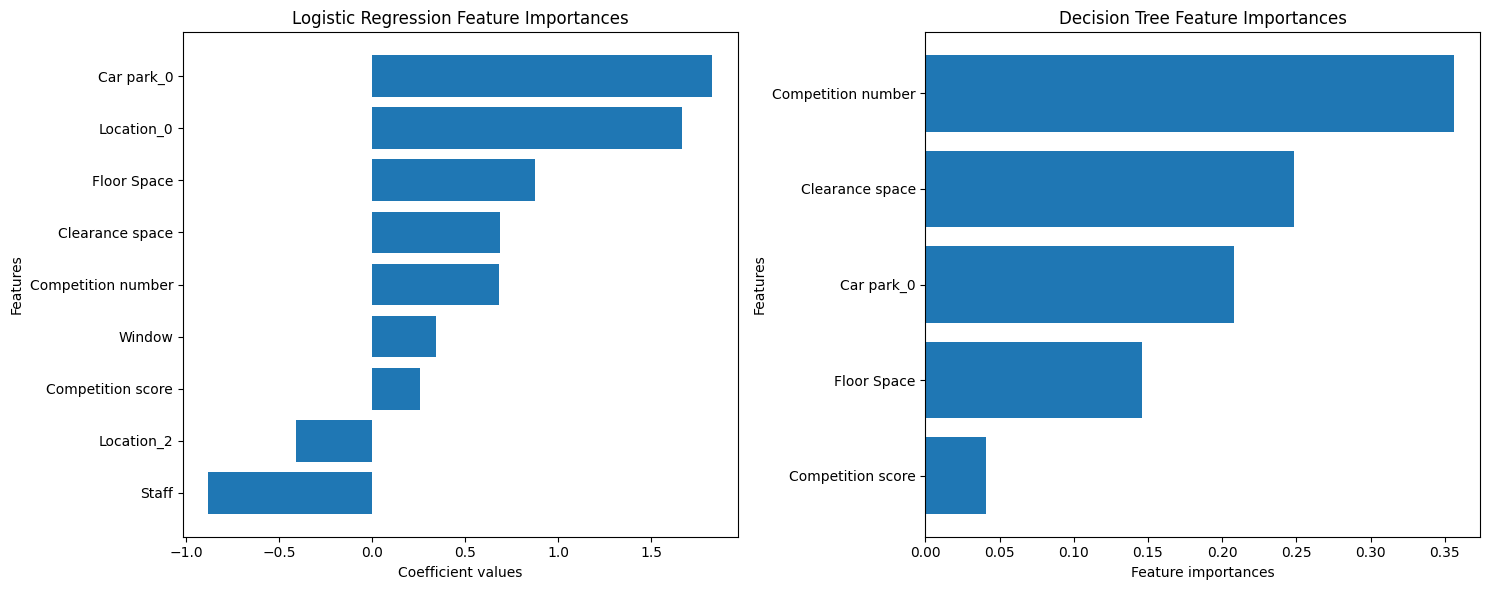

Based on the evaluation metrics, the best model for this dataset is:
Logistic Regression


In [ ]:

# Plot the results
labels = ["Logistic Regression", "Decision Tree", "Neural Network"]
accuracy_values = [acc_logreg, acc_tree, acc_nn]
precision_values = [prec_logreg, prec_tree, prec_nn]
recall_values = [recall_logreg, recall_tree, recall_nn]
f1_values = [f1_logreg, f1_tree, f1_nn]

x = np.arange(len(labels)) # the label locations
width = 0.2 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3 * width / 2, accuracy_values, width, label='Accuracy')
rects2 = ax.bar(x - width / 2, precision_values, width, label='Precision')
rects3 = ax.bar(x + width / 2, recall_values, width, label='Recall')
rects4 = ax.bar(x + 3 * width / 2, f1_values, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()
plt.show()

# Feature importances
# For Logistic Regression
importance_logreg = logreg.coef_[0]
sorted_idx_logreg = np.argsort(importance_logreg)
logreg_feature_names = selected_feature_names[sorted_idx_logreg]

# For Decision Tree
importance_tree = tree.feature_importances_
sorted_idx_tree = np.argsort(importance_tree)
tree_feature_names = selected_feature_names[sorted_idx_tree]

# Plot feature importances
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.barh(logreg_feature_names, importance_logreg[sorted_idx_logreg])
ax1.set_title("Logistic Regression Feature Importances")
ax1.set_xlabel("Coefficient values")
ax1.set_ylabel("Features")

ax2.barh(tree_feature_names, importance_tree[sorted_idx_tree])
ax2.set_title("Decision Tree Feature Importances")
ax2.set_xlabel("Feature importances")
ax2.set_ylabel("Features")

plt.tight_layout()
plt.show()

# Conclusion
print("Based on the evaluation metrics, the best model for this dataset is:")
if acc_nn > acc_logreg and acc_nn > acc_tree:
    print("Neural Network")
elif acc_logreg > acc_nn and acc_logreg > acc_tree:
    print("Logistic Regression")
else:
    print("Decision Tree")
